Data Collection and Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
import plotly.express as px

Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('restaurant_customer_satisfaction.csv')

# Display basic dataset information
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

Check Basic Statistics

In [3]:
# Basic descriptive statistics for numerical features
print(df.describe())

# Check for unique values in categorical columns
print(df['Gender'].value_counts())
print(df['PreferredCuisine'].value_counts())

        CustomerID          Age         Income  AverageSpend    GroupSize  \
count  1500.000000  1500.000000    1500.000000   1500.000000  1500.000000   
mean   1403.500000    43.832000   85921.890000    105.659004     5.035333   
std     433.157015    14.967157   38183.051749     52.381849     2.558864   
min     654.000000    18.000000   20012.000000     10.306127     1.000000   
25%    1028.750000    31.750000   52444.000000     62.287907     3.000000   
50%    1403.500000    44.000000   85811.000000    104.626408     5.000000   
75%    1778.250000    57.000000  119159.250000    148.649330     7.000000   
max    2153.000000    69.000000  149875.000000    199.973527     9.000000   

       OnlineReservation  DeliveryOrder  LoyaltyProgramMember     WaitTime  \
count        1500.000000    1500.000000           1500.000000  1500.000000   
mean            0.296667       0.405333              0.480000    30.163550   
std             0.456941       0.491120              0.499766    17.2141

Data Preprocessing

  Handle Missing Values

In [4]:
# Fill missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Double-check for missing values
print(df.isnull().sum())

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64


Encode Categorical Features

In [5]:
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['Gender', 'PreferredCuisine', 'DiningOccasion', 'MealType'], drop_first=True)

# Verify the transformation
print(df.head())

   CustomerID  Age  Income VisitFrequency  AverageSpend TimeOfVisit  \
0         654   35   83380         Weekly     27.829142   Breakfast   
1         655   19   43623         Rarely    115.408622      Dinner   
2         656   41   83737         Weekly    106.693771      Dinner   
3         657   43   96768         Rarely     43.508508       Lunch   
4         658   55   67937        Monthly    148.084627   Breakfast   

   GroupSize  OnlineReservation  DeliveryOrder  LoyaltyProgramMember  ...  \
0          3                  0              1                     1  ...   
1          1                  0              0                     0  ...   
2          6                  0              1                     0  ...   
3          1                  0              0                     0  ...   
4          1                  0              0                     1  ...   

   AmbianceRating  HighSatisfaction  Gender_Male  PreferredCuisine_Chinese  \
0               4               

Feature Scaling

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode only categorical columns that are not yet one-hot encoded
categorical_cols = ['VisitFrequency', 'TimeOfVisit', 'OnlineReservation']

# Apply label encoding
for col in categorical_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# Check the first few rows to verify encoding
print(df.head())

   CustomerID  Age  Income  VisitFrequency  AverageSpend  TimeOfVisit  \
0         654   35   83380               3     27.829142            0   
1         655   19   43623               2    115.408622            1   
2         656   41   83737               3    106.693771            1   
3         657   43   96768               2     43.508508            2   
4         658   55   67937               1    148.084627            0   

   GroupSize  OnlineReservation  DeliveryOrder  LoyaltyProgramMember  ...  \
0          3                  0              1                     1  ...   
1          1                  0              0                     0  ...   
2          6                  0              1                     0  ...   
3          1                  0              0                     0  ...   
4          1                  0              0                     1  ...   

   AmbianceRating  HighSatisfaction  Gender_Male  PreferredCuisine_Chinese  \
0               4   

Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale (skip one-hot encoded columns)
numerical_cols = ['Age', 'Income', 'AverageSpend', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
scaled_df = scaler.fit_transform(df[numerical_cols])

# Convert the scaled data back to a DataFrame and add it to the original DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=numerical_cols)
df[numerical_cols] = scaled_df

# Check the scaled values
print(df.head())

   CustomerID       Age    Income  VisitFrequency  AverageSpend  TimeOfVisit  \
0         654 -0.590289 -0.066593               3     -1.486313            0   
1         655 -1.659653 -1.108162               2      0.186188            1   
2         656 -0.189277 -0.057241               3      0.019761            1   
3         657 -0.055607  0.284150               2     -1.186885            2   
4         658  0.746416 -0.471175               1      0.810200            0   

   GroupSize  OnlineReservation  DeliveryOrder  LoyaltyProgramMember  ...  \
0          3                  0              1                     1  ...   
1          1                  0              0                     0  ...   
2          6                  0              1                     0  ...   
3          1                  0              0                     0  ...   
4          1                  0              0                     1  ...   

   AmbianceRating  HighSatisfaction  Gender_Male  Prefer

In [11]:
from sklearn.preprocessing import StandardScaler

# We are scaling only the numerical features like Age, Income, etc.
numerical_features = ['Age', 'Income', 'VisitFrequency', 'AverageSpend', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check if scaling was applied
df[numerical_features].head()

,Age,Income,VisitFrequency,AverageSpend,WaitTime,ServiceRating,FoodRating,AmbianceRating
0,-0.590289,-0.066593,1.039536,-1.486313,0.776385,-0.733697,1.411872,0.698279
1,-1.659653,-1.108162,0.081733,0.186188,1.589960,1.374628,1.411872,0.008734
2,-0.189277,-0.057241,1.039536,0.019761,1.076162,-0.030922,0.706876,1.387824
3,-0.055607,0.284150,0.081733,-1.186885,-1.313922,0.671853,1.411872,-1.370355
4,0.746416,-0.471175,-0.876071,0.810200,0.443125,-0.733697,0.001880,1.387824


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['VisitFrequency'].plot(kind='hist', bins=20, title='VisitFrequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AverageSpend'].plot(kind='hist', bins=20, title='AverageSpend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Income', y='VisitFrequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='VisitFrequency', y='AverageSpend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AverageSpend', y='WaitTime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WaitTime']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('WaitTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WaitTime')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WaitTime']
  ys = series['Income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('WaitTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WaitTime')
_ = plt.ylabel('Income')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WaitTime']
  ys = series['VisitFrequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('WaitTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WaitTime')
_ = plt.ylabel('VisitFrequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WaitTime']
  ys = series['AverageSpend']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('WaitTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WaitTime')
_ = plt.ylabel('AverageSpend')

from matplotlib import pyplot as plt
_df_12['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Income'].plot(kind='line', figsize=(8, 4), title='Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['VisitFrequency'].plot(kind='line', figsize=(8, 4), title='VisitFrequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['AverageSpend'].plot(kind='line', figsize=(8, 4), title='AverageSpend')
plt.gca().spines[['top', 'right']].set_visible(False)

Exploratory Data Analysis (EDA)

Univariate Analysis

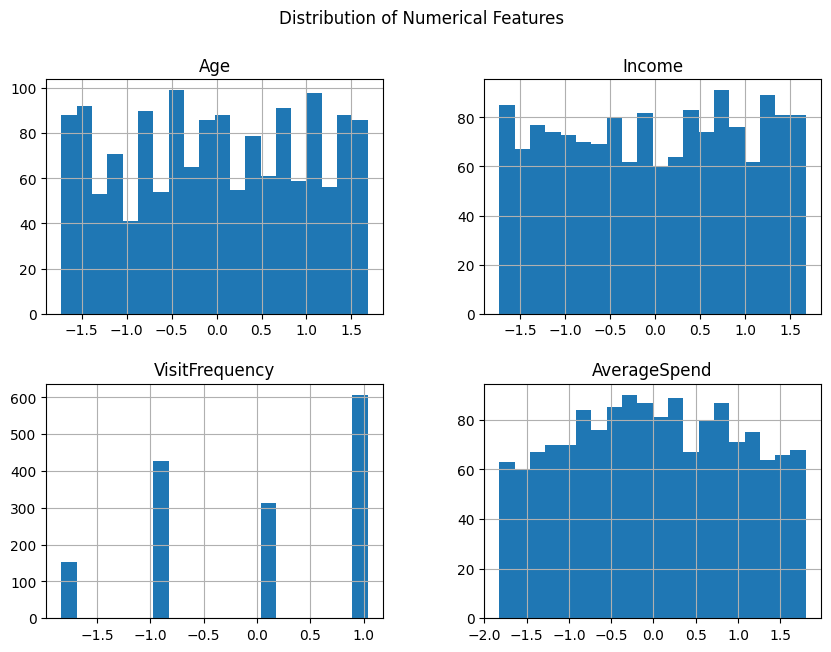

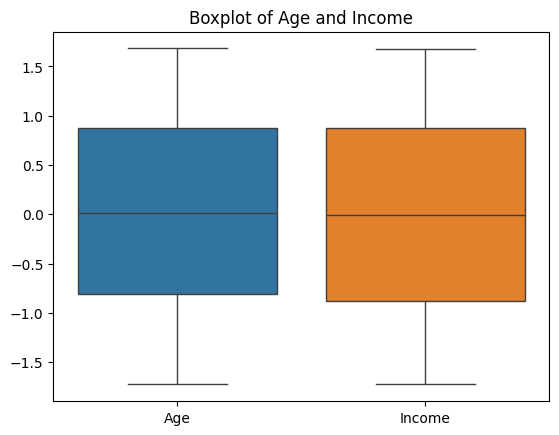

In [12]:
# Histogram of key numerical features
df[['Age', 'Income', 'VisitFrequency', 'AverageSpend']].hist(bins=20, figsize=(10, 7))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplot for detecting outliers in 'Income' and 'Age'
sns.boxplot(data=df[['Age', 'Income']])
plt.title('Boxplot of Age and Income')
plt.show()


Bivariate Analysis


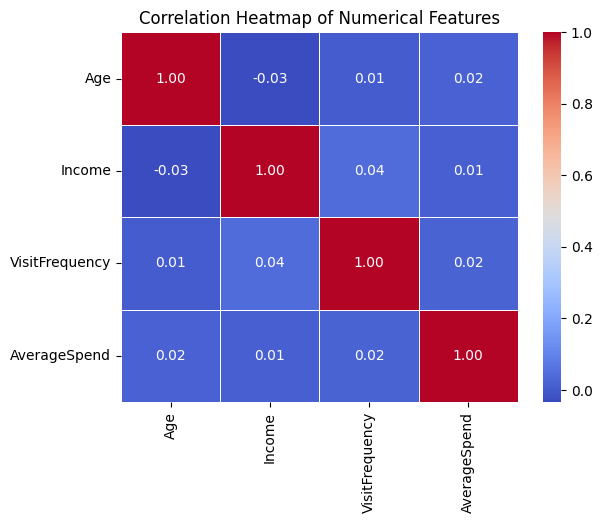

In [13]:
# Correlation heatmap between numerical features
corr = df[['Age', 'Income', 'VisitFrequency', 'AverageSpend']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Distribution of Key Categorical Features

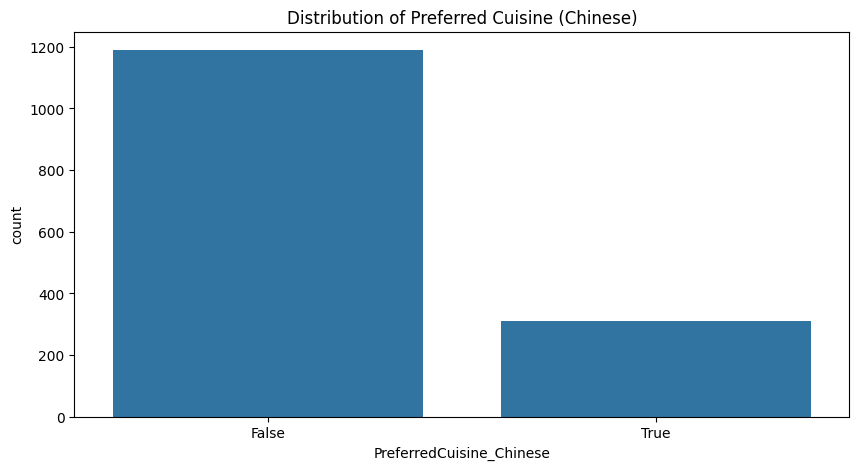

In [14]:
# Bar plot for categorical variables
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PreferredCuisine_Chinese')
plt.title('Distribution of Preferred Cuisine (Chinese)')
plt.show()

RFM Score Calculation

Defining RFM Scores

In [15]:
# Calculating Recency (assuming 'WaitTime' indicates recency, lower means more recent)
df['Recency'] = df['WaitTime']

# Frequency: Directly use 'VisitFrequency' as it indicates the number of visits
df['Frequency'] = df['VisitFrequency']

# Monetary: Directly use 'AverageSpend' to capture the average amount spent by a customer
df['Monetary'] = df['AverageSpend']

# Verify RFM calculation
df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].head()

,CustomerID,Recency,Frequency,Monetary
0,654,0.776385,1.039536,-1.486313
1,655,1.589960,0.081733,0.186188
2,656,1.076162,1.039536,0.019761
3,657,-1.313922,0.081733,-1.186885
4,658,0.443125,-0.876071,0.810200


from matplotlib import pyplot as plt
_df_16['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='CustomerID', y='Recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Recency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Recency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Monetary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Monetary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_27['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

Normalizing RFM Scores for Clustering

In [16]:
# We will normalize the RFM scores to prepare for clustering
df[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])

# Check the scaled RFM scores
df[['Recency', 'Frequency', 'Monetary']].head()

,Recency,Frequency,Monetary
0,0.776385,1.039536,-1.486313
1,1.589960,0.081733,0.186188
2,1.076162,1.039536,0.019761
3,-1.313922,0.081733,-1.186885
4,0.443125,-0.876071,0.810200


from matplotlib import pyplot as plt
_df_31['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

Clustering Implementation (K-Means)

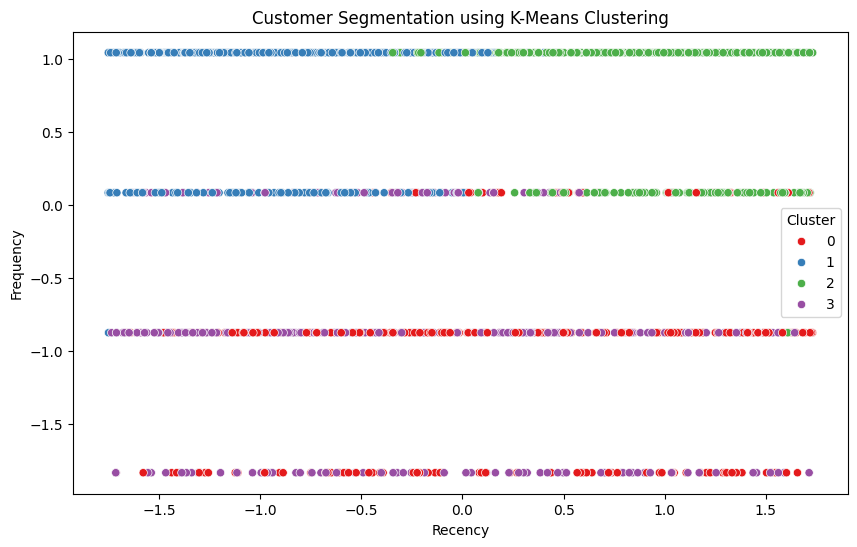

In [17]:
from sklearn.cluster import KMeans

# Defining the RFM feature set for clustering
rfm_features = df[['Recency', 'Frequency', 'Monetary']]

# Applying K-Means with 4 clusters (you may try different values of k based on analysis)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model and assign the cluster labels to the DataFrame
df['Cluster'] = kmeans.fit_predict(rfm_features)

# Visualizing the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

Cluster Centers and Cluster Analysis

In [18]:
# Print the cluster centers (mean values for each cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'Monetary'])
print("Cluster Centers:")
print(cluster_centers)

# Grouping by cluster to see average characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary (Average RFM and Other Features):")
print(cluster_summary)

Cluster Centers:
    Recency  Frequency  Monetary
0  0.220505  -0.951467 -0.927251
1 -0.885819   0.786750 -0.288476
2  0.904350   0.801289  0.336415
3 -0.201507  -0.917594  0.876573
Cluster Summary (Average RFM and Other Features):
          CustomerID       Age    Income  VisitFrequency  AverageSpend  \
Cluster                                                                  
0        1322.988304 -0.067137 -0.057892       -0.954488     -0.924134   
1        1437.980676  0.061920  0.037470        0.785047     -0.291246   
2        1436.192982 -0.040364  0.060527        0.797085      0.336977   
3        1404.124638  0.038931 -0.057576       -0.917715      0.875873   

         TimeOfVisit  GroupSize  OnlineReservation  DeliveryOrder  \
Cluster                                                             
0           0.961988   4.912281           0.298246       0.409357   
1           0.980676   5.111111           0.311594       0.386473   
2           0.989975   4.957393           0.298

Model Evaluation

Evaluating Clustering with Silhouette Score

In [19]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score to evaluate the quality of clustering
sil_score = silhouette_score(rfm_features, df['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.29


Davies-Bouldin Index (Another Evaluation Metric)

In [20]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index to evaluate clustering performance
db_score = davies_bouldin_score(rfm_features, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score:.2f}")

Davies-Bouldin Index: 1.18


Visualizing Clusters with Different Metrics

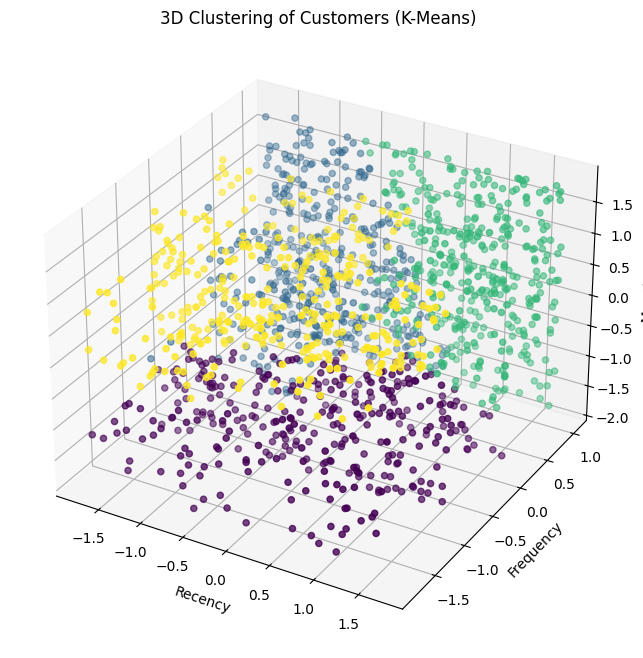

In [21]:
# Visualizing clusters in a 3D space (Recency, Frequency, Monetary)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Clustering of Customers (K-Means)')
plt.show()

Insights

In [22]:
# Show the characteristics of each cluster, including Recency, Frequency, and Monetary
cluster_summary = df.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'Age': 'mean',
    'Income': 'mean'
})

# Print the cluster summary
print(cluster_summary)

          Recency           Frequency            Monetary                 Age  \
             mean       std      mean       std      mean       std      mean   
Cluster                                                                         
0        0.229848  0.922164 -0.954488  0.599760 -0.924134  0.541658 -0.067137   
1       -0.885017  0.542876  0.785047  0.433940 -0.291246  0.892559  0.061920   
2        0.906116  0.528171  0.797085  0.427895  0.336977  0.913031 -0.040364   
3       -0.213772  0.920651 -0.917715  0.580472  0.875873  0.544475  0.038931   

           Income  
             mean  
Cluster            
0       -0.057892  
1        0.037470  
2        0.060527  
3       -0.057576  
